In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Customer Segmentation Analysis

### Step 1) Data Exploration & Cleaning

In [2]:
# Load the dataset
df = pd.read_excel("Customer Segmentation Dataset.xlsx")

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,1,12691.0,777,11914.0,1144,42
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,1,8256.0,864,7392.0,1291,33
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,1,3418.0,0,3418.0,1887,20
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,4,3313.0,2517,796.0,1171,20
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,1,4716.0,0,4716.0,816,28


In [4]:
df.shape

(10127, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLIENTNUM               10127 non-null  int64  
 1   Attrition_Flag          10127 non-null  object 
 2   Customer_Age            10127 non-null  int64  
 3   Gender                  10127 non-null  object 
 4   Dependent_count         10127 non-null  int64  
 5   Education_Level         10127 non-null  object 
 6   Marital_Status          10127 non-null  object 
 7   Income_Category         10127 non-null  object 
 8   Card_Category           10127 non-null  object 
 9   Months_on_book          10127 non-null  int64  
 10  Months_Inactive_12_mon  10127 non-null  int64  
 11  Credit_Limit            10127 non-null  float64
 12  Total_Revolving_Bal     10127 non-null  int64  
 13  Avg_Open_To_Buy         10127 non-null  float64
 14  Total_Trans_Amt         10127 non-null

In [6]:
# Find unique values in each categorical columns
num_cols = ["CLIENTNUM","Customer_Age","Dependent_count","Months_on_book","Months_Inactive_12_mon","Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Trans_Amt","Total_Trans_Ct"]

for col in df.columns:
    if col not in num_cols:
        print(col)
        print(df[col].unique())
        print("-" * 52)

Attrition_Flag
['Existing Customer' 'Attrited Customer']
----------------------------------------------------
Gender
['M' 'F']
----------------------------------------------------
Education_Level
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
----------------------------------------------------
Marital_Status
['Married' 'Single' 'Unknown' 'Divorced']
----------------------------------------------------
Income_Category
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
----------------------------------------------------
Card_Category
['Blue' 'Gold' 'Silver' 'Platinum']
----------------------------------------------------


In [7]:
# Check values for categorical columns
print(df['Attrition_Flag'].value_counts())

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


In [8]:
print(df['Gender'].value_counts())

Gender
F    5358
M    4769
Name: count, dtype: int64


In [9]:
print(df['Education_Level'].value_counts())

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64


In [10]:
print(df['Marital_Status'].value_counts())

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64


In [11]:
print(df['Income_Category'].value_counts())

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64


In [12]:
print(df['Card_Category'].value_counts())

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


In [13]:
print(df['Attrition_Flag'].value_counts())

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


In [14]:
# Check for missing values
print(df.isnull().sum())

CLIENTNUM                 0
Attrition_Flag            0
Customer_Age              0
Gender                    0
Dependent_count           0
Education_Level           0
Marital_Status            0
Income_Category           0
Card_Category             0
Months_on_book            0
Months_Inactive_12_mon    0
Credit_Limit              0
Total_Revolving_Bal       0
Avg_Open_To_Buy           0
Total_Trans_Amt           0
Total_Trans_Ct            0
dtype: int64


In [15]:
# Drop useless columns
df.drop(columns=['CLIENTNUM', 'Attrition_Flag', "Card_Category"], inplace=True)
df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct
0,45,M,3,High School,Married,$60K - $80K,39,1,12691.0,777,11914.0,1144,42
1,49,F,5,Graduate,Single,Less than $40K,44,1,8256.0,864,7392.0,1291,33
2,51,M,3,Graduate,Married,$80K - $120K,36,1,3418.0,0,3418.0,1887,20
3,40,F,4,High School,Unknown,Less than $40K,34,4,3313.0,2517,796.0,1171,20
4,40,M,3,Uneducated,Married,$60K - $80K,21,1,4716.0,0,4716.0,816,28


### Step 2) Exploratory Data Analysis

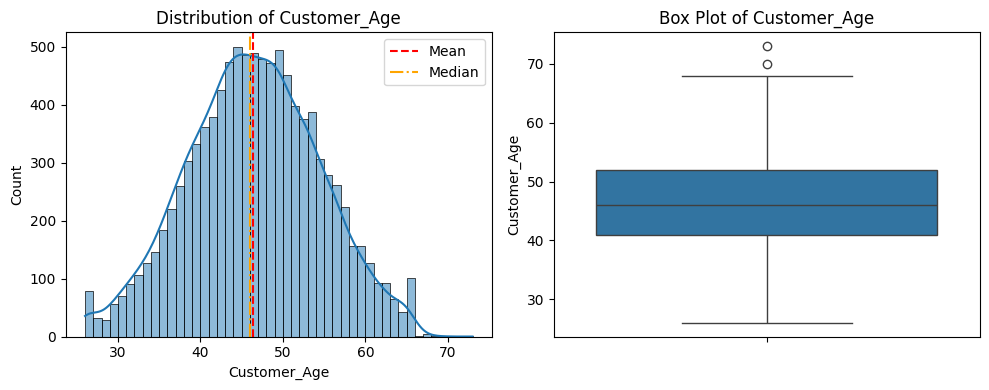

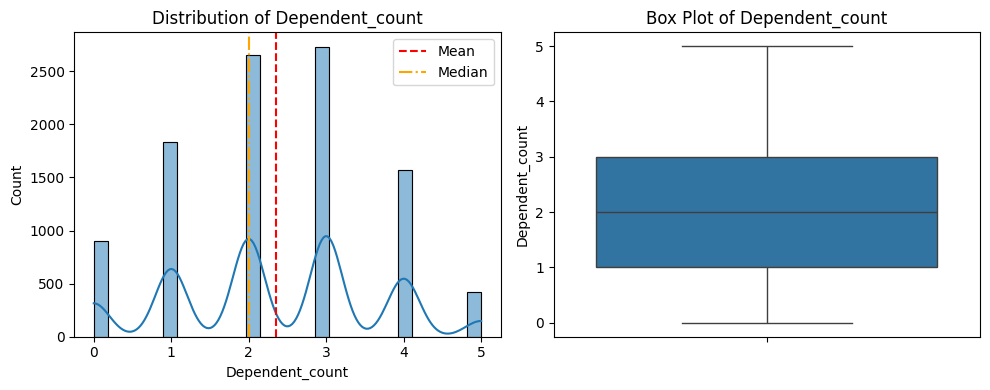

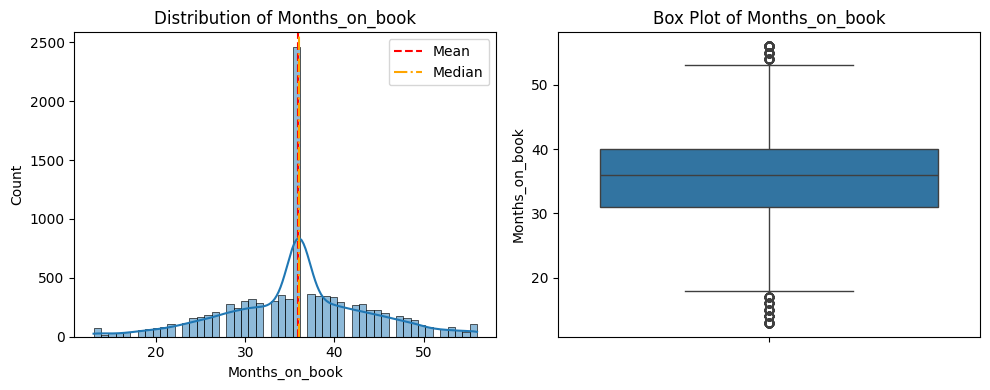

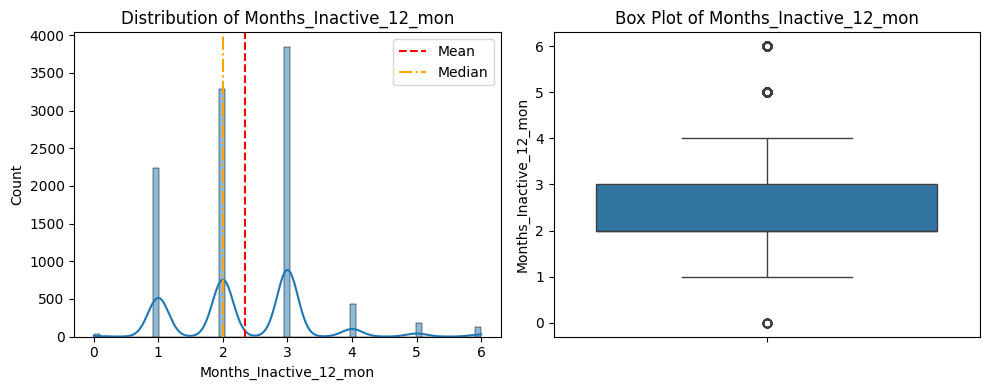

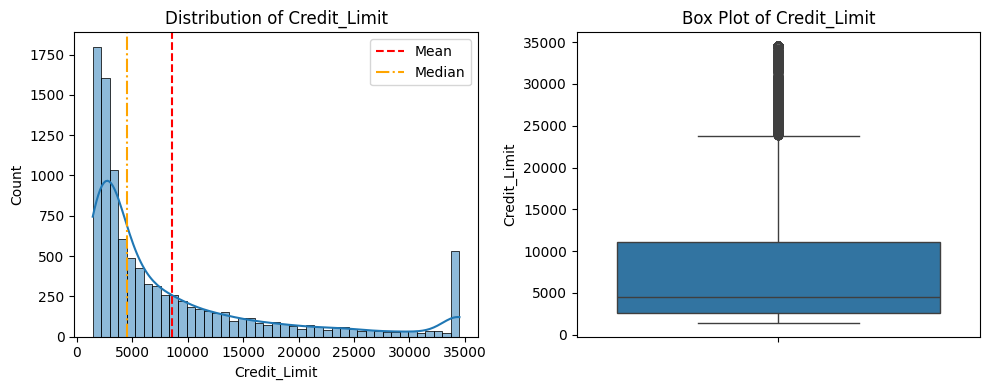

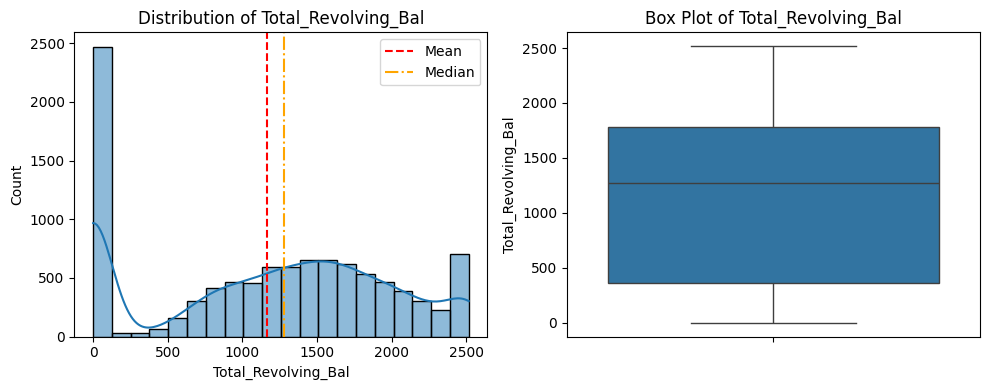

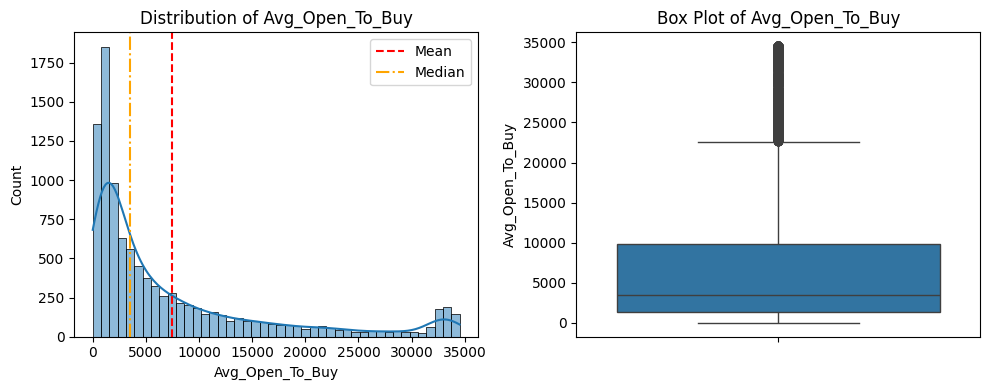

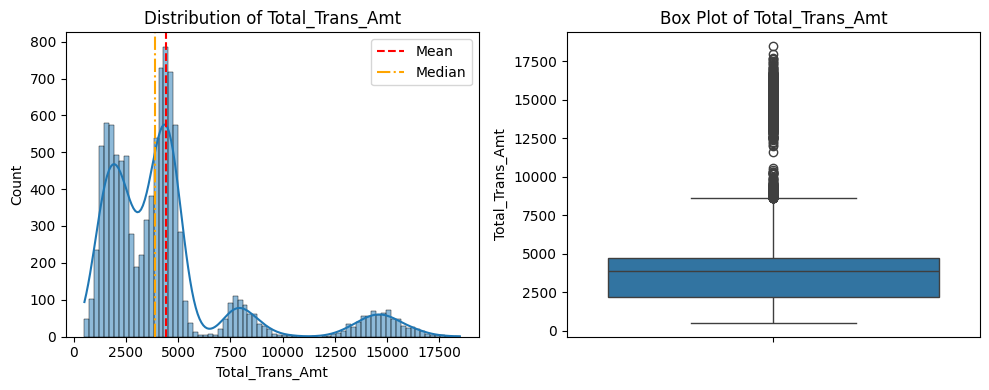

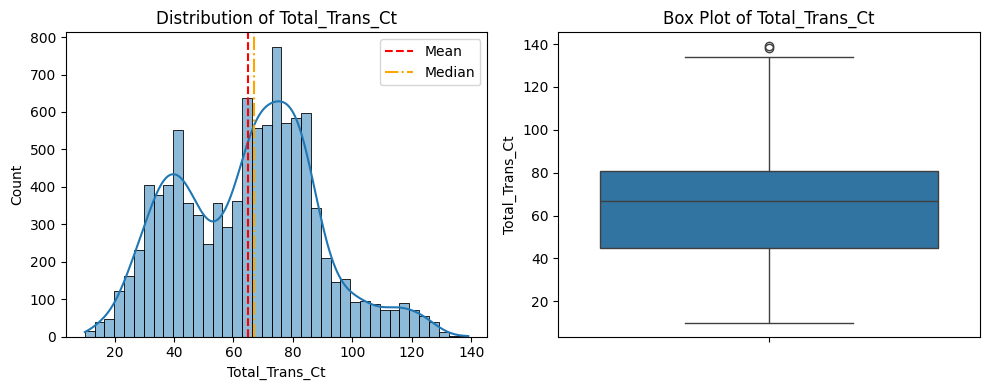

In [16]:
# Plot a histogram and boxplot showing the distribution for each numerical column
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

def plot_distribution(df, column_name):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Histogram 
    sns.histplot(df[column_name], kde=True, ax=axes[0])

    # Vertical line for mean and median
    axes[0].axvline(df[column_name].mean(), color='red', linestyle='--', label='Mean')
    axes[0].axvline(df[column_name].median(), color='orange', linestyle='-.', label='Median')

    axes[0].set_title(f"Distribution of {column_name}")
    axes[0].legend()

    # Boxplot
    sns.boxplot(y=df[column_name], ax=axes[1])
    axes[1].set_title(f"Box Plot of {column_name}")
    axes[1].set_ylabel(column_name)

    plt.tight_layout()
    plt.show()

# Apply the function to each numerical column
for col in num_cols:
    plot_distribution(df, col)

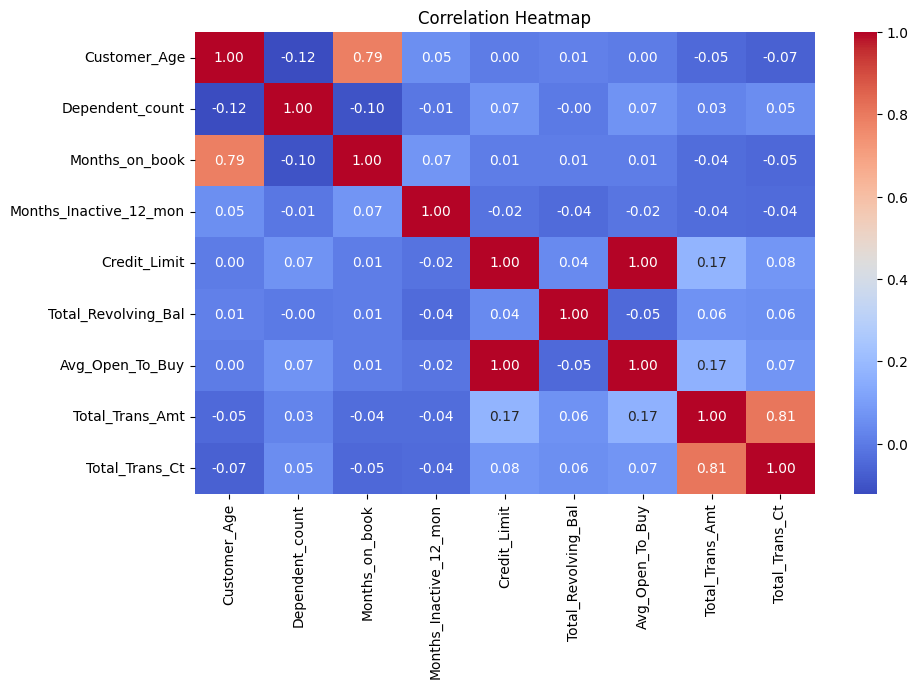

In [17]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

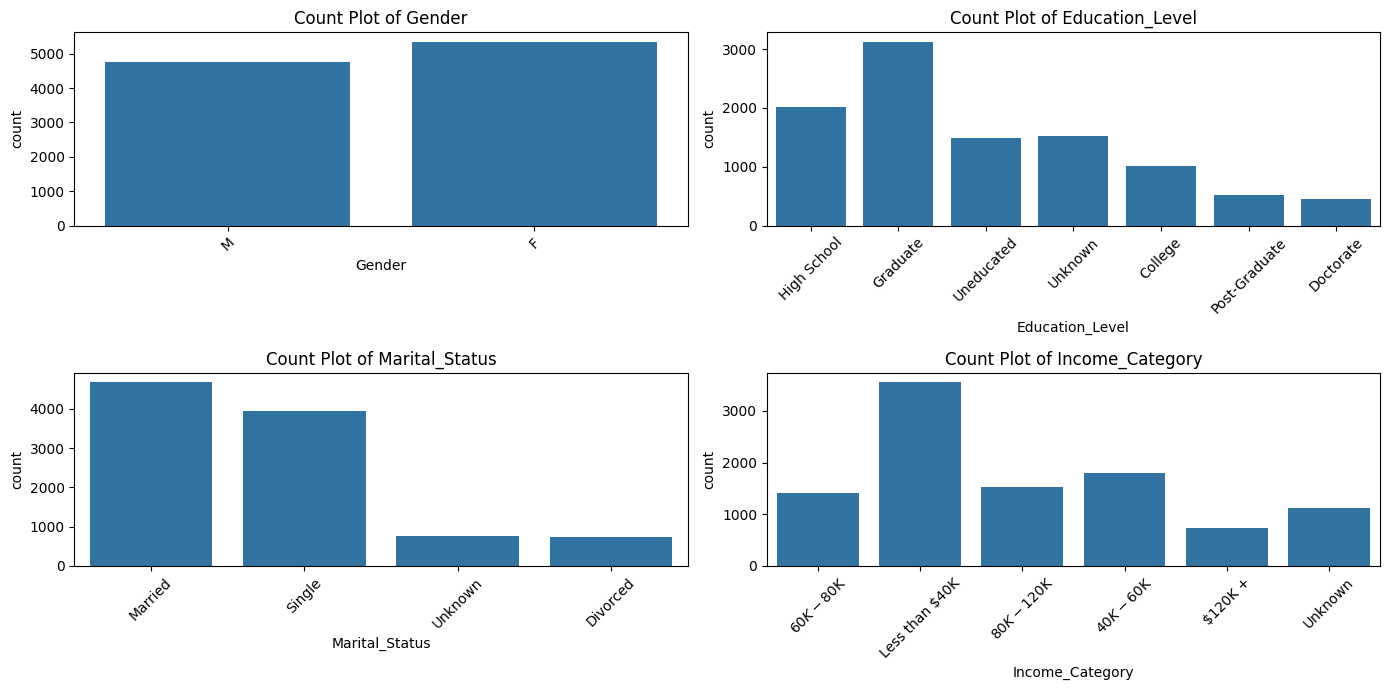

In [18]:
# Count plot for each categorical column

# Create a 2x2 grid to display all the plots
fig, axes = plt.subplots(2, 2, figsize=(14, 7))
axes = axes.flatten() 

# Loop through each column
for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Count Plot of {col}")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [19]:
df.to_excel("Cleaned Customer Segmentation Dataset.xlsx", index=False)